In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
data = pd.read_csv('/content/gld_price_data.csv')

In [6]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
data.shape

(2290, 6)

In [8]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# no missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Finding Correlation


In [12]:
correlation = data.drop(columns='Date', axis = 1).corr()

<Axes: >

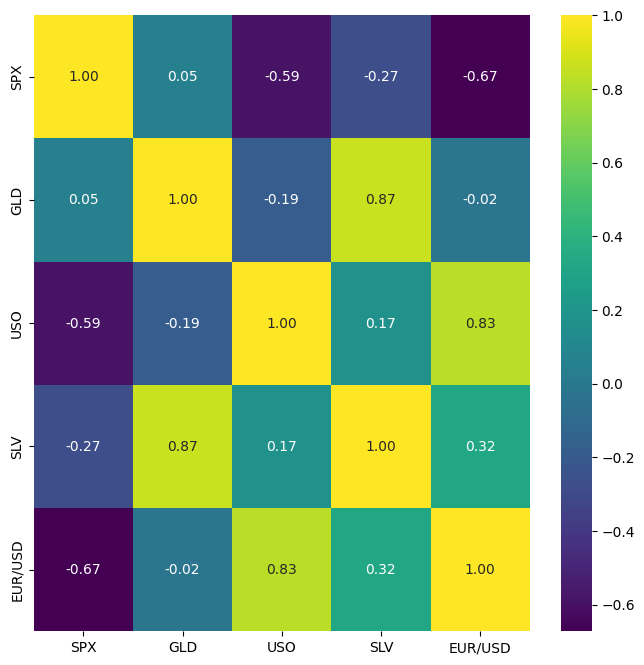

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot= True, fmt='.2f', cmap='viridis')

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-c8ef752ee8f7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'], color= 'blue')


<Axes: xlabel='GLD', ylabel='Density'>

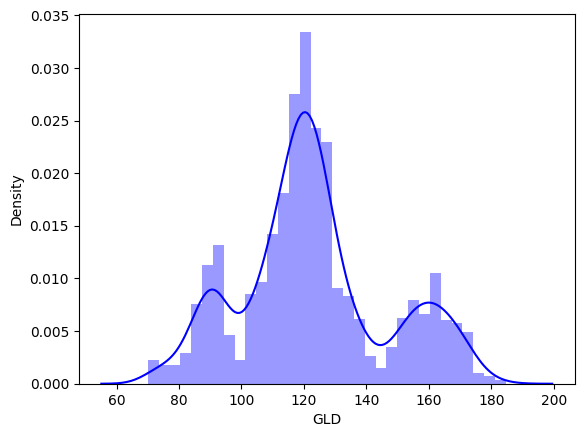

In [15]:
sns.distplot(data['GLD'], color= 'blue')

Data Splitting

In [16]:
X = data.drop(columns = ['Date','GLD'], axis = 1)
Y = data['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

Model training

In [20]:
regressor = RandomForestRegressor(n_estimators= 100)

In [21]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
prediction = regressor.predict(X_test)
print(prediction)

[168.56879948  82.17219995 116.06140003 127.63930097 120.68810117
 154.62239711 150.00739791 126.23130013 117.56619896 126.0074003
 116.31110109 171.87760089 141.21589794 167.94719786 115.19089977
 117.68980055 138.51610259 170.2870011  159.46960395 159.34839955
 155.20099983 125.60900046 176.14279901 157.43620332 125.18730032
  93.7519997   77.81069992 120.68680014 119.19239959 167.46579996
  88.34700046 125.30529973  91.18120084 117.69570054 121.18239927
 135.7146004  115.48580152 115.32750095 147.33299902 107.21170091
 104.1894026   87.30979801 126.4008008  118.18039982 152.49879898
 119.56940021 108.34410016 108.08549839  93.22310056 127.2525972
  74.67460051 113.615399   121.26159985 111.20689911 118.90729883
 120.48489927 159.57130026 169.14830061 146.85659667  86.02119887
  94.48760025  86.75179906  90.55660003 118.90450039 126.45330058
 127.51860013 168.63679959 122.29989913 117.43759907  98.38929992
 168.63240102 143.22839816 131.7711019  121.21540216 120.99389959
 119.5738005

In [24]:
# using R squared error for evaluation
# Regression models don't use accuracy like classification models
error_score = metrics.r2_score(prediction, Y_test) # (Y_test, prediction) bhi same hi error score dega. Sequence se farak nahi padega
print(error_score)

0.9891679760156131


In [27]:
# Compared to the range of values, this error score is fine

Visualization

In [33]:
type(Y_test)
# Need to change it to list for plotting graphs

pandas.core.series.Series

In [35]:
Y_test = list(Y_test)

Text(0.5, 1.0, 'Comparison')

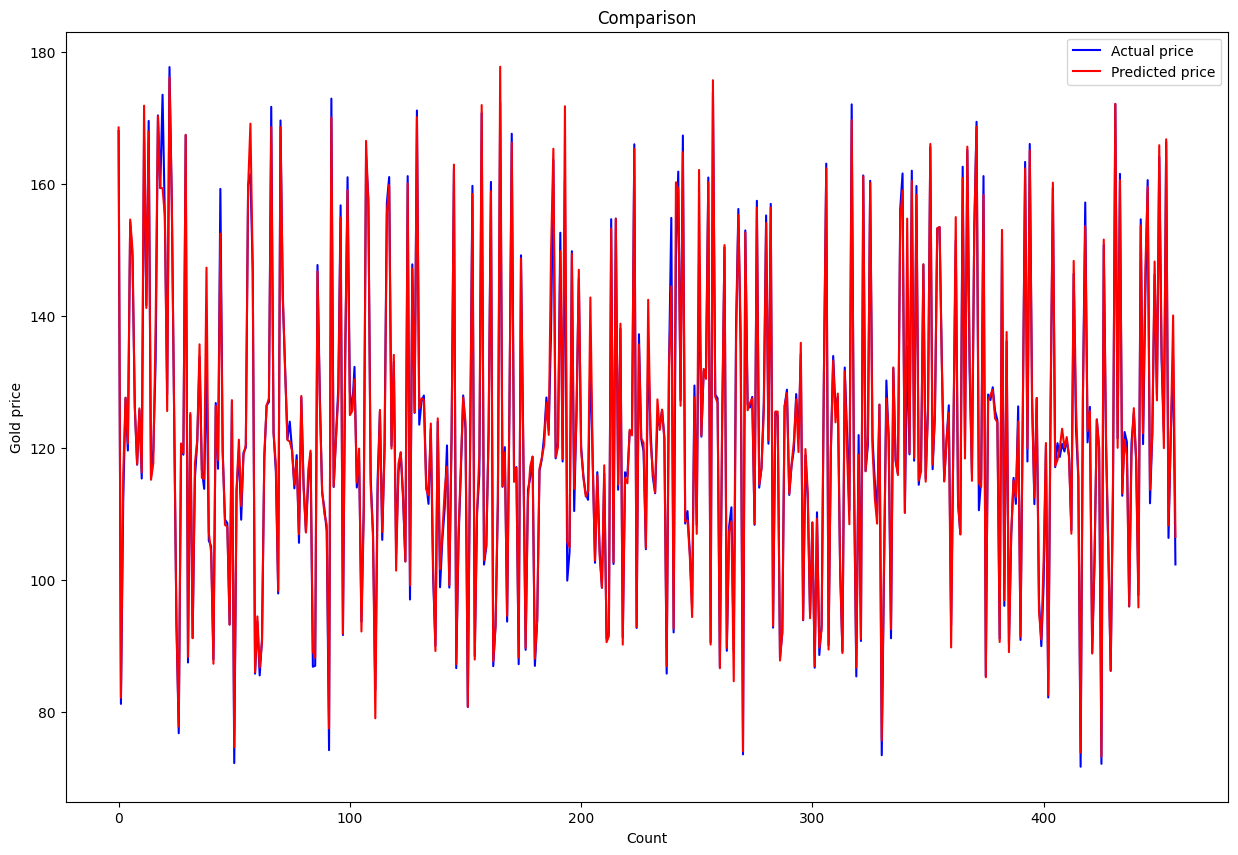

In [45]:
plt.figure(figsize=(15,10))
plt.plot(Y_test, color = 'blue', label = 'Actual price')
plt.plot(prediction, color= 'red', label = 'Predicted price')
plt.legend()
plt.xlabel('Count')
plt.ylabel('Gold price')
plt.title('Comparison')